# Upper bound of $\tilde\vartheta^d(G, w)$ and $\vartheta^d(G, w)$

$\tilde\vartheta^d(G, w)$ is defined as

(Eq. 1)
$$\begin{align}
\max_{X}\quad & \sum_{i=1}^n w_i X_{ii}\\
\mathrm{s.t.}\quad & X_{00} = 1, ~ X_{0i} = X_{ii},\\
& X_{ij} = 0 ~~ \text{for} ~~ \{i,j\}\in E,\\
& X \ge 0, ~ \mathrm{rank}(X) = d.
\end{align}
$$

$\tilde\vartheta^d(G, w)$ can be written the following convex optimization problem

(Eq. 1)
$$\begin{align}
\max_{\Phi_{AB}}\quad & \mathrm{Tr}[(|0\rangle\langle 0|\otimes\mathbb{I}_d\otimes\sum_{i=1}^nw_i|i\rangle\langle i|\otimes\mathbb{I}_d)\Phi_{AB} ]\\
\mathrm{s.t.}\quad & \Phi_{AB}\in\mathrm{SEP}, ~ V_{AB}\Phi_{AB} = \Phi_{AB},\\
& \mathrm{Tr}[(|0\rangle\langle 0|\otimes\mathbb{I}_d\otimes|0\rangle\langle 0|\otimes\mathbb{I}_d)\Phi_{AB}] = 1,\\
& \mathrm{Tr}_A[(|i\rangle\langle j|\otimes\mathbb{I}_d\otimes\mathbb{I}_B)\Phi_{AB} ] = 0 ~~ \text{for} ~~ \{i,j\}\in E,\\
& \mathrm{Tr}_A[(|0\rangle\langle i|\otimes\mathbb{I}_d\otimes\mathbb{I}_B)\Phi_{AB} ] = 
\mathrm{Tr}_A[(|i\rangle\langle i|\otimes\mathbb{I}_d\otimes\mathbb{I}_B)\Phi_{AB} ].\\
\end{align}
$$

Consider the PPT relaxation, the problem is feasible only if the solution of the following optimization is nonnegative.

(Eq. 2)
$$\begin{align}
\max_{\Phi_I,~\Phi_V}\quad &  \mathrm{Tr}[(|0\rangle\langle 0|\otimes\sum_{i=1}^nw_i|i\rangle\langle i|) (d^2 \Phi_I + d \Phi_V)]\\
\mathrm{s.t.}~~~\quad & \Phi_I + \Phi_V \ge 0, ~ \Phi_I - \Phi_V \ge 0, ~
\Phi_I^{T_{A_1}} \ge 0, ~ \Phi_I^{T_{A_1}} + d\Phi_V^{T_{A_1}} \ge 0,\\
& \Phi_V = V_{A_1B_1} \Phi_I, ~ \mathrm{Tr}[(|0\rangle\langle 0|\otimes|0\rangle\langle 0|) (d^2 \Phi_I + d \Phi_V)] = 1\\
& \mathrm{Tr}_{A_1}[(|i\rangle\langle j|\otimes\mathbb{I}_{n+1}) (d^2 \Phi_I + d \Phi_V)] = 0 ~~ \text{for} ~~ \{i,j\}\in E,\\
& \mathrm{Tr}_{A_1}[(|0\rangle\langle i|\otimes\mathbb{I}_{n+1}) (d^2 \Phi_I + d \Phi_V)] = \mathrm{Tr}_{A_1}[(|i\rangle\langle i|\otimes\mathbb{I}_{n+1}) (d^2 \Phi_I + d \Phi_V)].\\
\end{align}
$$

In principle, $\Phi_I$ and $\Phi_V$ should be Hermitian matrices. However, as all the parameters involved in (Eq. 2) are real, $\Phi_I$ and $\Phi_V$ can be restricted to be real symmetric matrices. In addition, some extra constraints, e.g., the basis indetity and the obtained lower bounds for $\tilde\vartheta^d(G, w)$ and $\vartheta^d(G, w)$, can also be utilized for improving the upper bounds.

In [1]:
import numpy as np
import cvxpy as cvx
import networkx as nx
import scipy.linalg as lin

w = [1. 1. 1. 1. 1. 1. 1. 1. 1.]


/tmp/ipykernel_27105/1532849509.py:9: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  G = nx.adjacency_matrix(graph, dtype=float).todense()


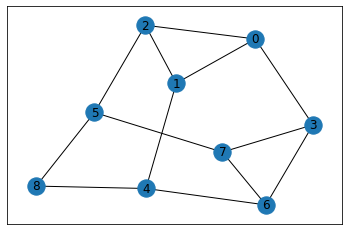

In [2]:
# Define the graph (in graph6 format)
graph = nx.from_graph6_bytes(b'H{O_okK')

# draw the graph
nx.draw_networkx(graph)


# G is the adjacency matrix
G = nx.adjacency_matrix(graph, dtype=float).todense()
#print("The adjacency matrix:\n", G)


# n is the number of vertices
n = G.shape[0]
#print("Number of vertices:", n)

# w_i
w = np.ones(n)

print("w =", w)

In [3]:
# V_{A_1B_1}

V = np.zeros((n + 1, n + 1, n + 1, n + 1))
for i in range(n + 1):
    for j in range(n + 1):
        V[i,j,j,i] = 1
        
V = V.reshape(((n + 1)**2, (n + 1)**2))
        
# edge indexing
GG = np.zeros([n + 1, n + 1])
GG[1:, 1:] = G


Wn = np.zeros([n + 1, n + 1])
Wn[1:n+1, 1:n+1] = np.diag(w)

In [4]:
# Construct the SDP

d = cvx.Parameter(nonneg=True) # d

PhiP = cvx.Variable(((n + 1) ** 2, (n + 1) ** 2), PSD=True) # PhiI + PhiV
PhiM = cvx.Variable(((n + 1) ** 2, (n + 1) ** 2), PSD=True) # PhiI - PhiV
PhiT = cvx.Variable(((n + 1) ** 2, (n + 1) ** 2), PSD=True) # PhiI^T (partial transpose)
PhiTD = cvx.Variable(((n + 1) ** 2, (n + 1) ** 2), PSD=True) # PhiI^T + d*PhiV^T


PhiI = (PhiP + PhiM)/2
PhiV = (PhiP - PhiM)/2
PhiDV = d ** 2 * PhiI + d * PhiV

# obj = cvx.Maximize(cvx.lambda_min(PhiP)
#                    +cvx.lambda_min(PhiM)
#                    +cvx.lambda_min(PhiT)
#                    +cvx.lambda_min(PhiTK)
#                   )


# Express PhiDV as (n+1)*(n+1) block matrices
Slice = [[PhiDV[i*(n+1):(i+1)*(n+1), j*(n+1):(j+1)*(n+1)]
          for i in range(n + 1)]
         for j in range(n + 1)]


obj = cvx.Maximize(cvx.trace(Wn @ Slice[0][0]))

cons = []

cons += [V @ PhiP == PhiP, V @ PhiM == - PhiM]
cons += [cvx.partial_transpose(PhiT, dims=[n + 1, n + 1], axis=0) == PhiI,
         cvx.partial_transpose(PhiTD, dims=[n + 1, n + 1], axis=0) == PhiI + d * PhiV]


cons += [cvx.multiply(np.kron(GG, np.ones([n + 1, n + 1])), PhiDV) == 0]
cons += [Slice[0][i] == Slice[i][i] for i in range(1, n + 1)]
cons += [PhiDV[0][0] == 1]

In [5]:
d.value = 3

prob = cvx.Problem(obj, cons)
prob.solve(solver="MOSEK", ignore_dpp=True, verbose=False)
print("Naive upper bound for both theta and tilde theta:", prob.value)

Naive upper bound for both theta and tilde theta: 3.36373529177744


In [6]:
# extra constraints for \theta

extra = []

# extra constraints from basis identities
for cli in nx.find_cliques(graph):
    if len(cli) == d.value:
        extra += [sum([Slice[0][j + 1] for j in cli]) == Slice[0][0]]
        
# extra constraints from lower bound of \theta
lb = 3.33
extra += [cvx.partial_trace(np.kron(Wn, np.identity(n + 1)) @ PhiDV, dims=[n + 1, n + 1], axis=0) >> lb * Slice[0][0]]

In [7]:
prob = cvx.Problem(obj, cons + extra)
prob.solve(solver="MOSEK", ignore_dpp=True, verbose=False)
print("Improved upper bound for theta:", prob.value)

Improved upper bound for theta: 3.333333334663358


In [8]:
# extra constraints for \tilde\theta

textra = []
   
# extra constraints from lower bound of \tilde\theta
tlb = 3.3380
textra += [cvx.partial_trace(np.kron(Wn, np.identity(n + 1)) @ PhiDV, dims=[n + 1, n + 1], axis=0) >> tlb * Slice[0][0]]

In [9]:
prob = cvx.Problem(obj, cons + textra)
prob.solve(solver="MOSEK", ignore_dpp=True, verbose=False)
print("Improved upper bound for tilde theta:", prob.value)

Improved upper bound for tilde theta: 3.3534916305131253
